# Analysis of the fluoresence intensity from the 4 point ODMR experiments

In this script I will read in the data from the .txt file that holds all of the information about the fluorescence intensity. 
I will create graphs that look at the:
1. Change in fluorescence intensity with increased dwell time. 
2. The change in the fraction error of the recorded data points for the 4 point measurements for the STD of the measurements recorded. 
3. The change in the fraction error of the recorded data points for the 4 point measurements for the SQRT of the mean recorded counts. 

In [4]:
import matplotlib.pyplot as plot
import scipy.optimize as opt
import os 
import pandas as pd 
import numpy as np 

In [5]:
def load_data(file_path):
    # load in the params data. 
    four_point_data = pd.read_table(file_path, index_col = False) 
    return(four_point_data)

In [6]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [7]:
def plot_sqrt(x, A, b, c):
    '''Creates a Y = A/root(b*T) dataset.'''
    sqrt_value = np.sqrt(b*x)
    with np.errstate(divide='ignore'):
        y = (A /sqrt_value) + c
    return(y)

In [8]:
def plot_linear(x, m, c):
    '''Creates a linear fitting'''
    
    y = m*x + c
    return(y)

### Get the data into a pandas variable

In [20]:
folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\20210920\\'
file_path = folder_path + '20210920_4_point_referenced_odmr_normalised_intensity_analysis.txt'
data_set = load_data(file_path)
set_plot_params()
#print(data_set)

### Get the data into arrays

In [47]:
dwell_time = data_set['Dwell time ($\mu$s)']
number_of_repeats = data_set['Number of Repeats']

I_1 = data_set['I_1 (per dwell time)']
I_1_std = data_set['STD(I_1) (per dwell time)']
I_2 = data_set['I_2 (per dwell time)']
I_2_std = data_set['STD(I_2) (per dwell time)']
I_3 = data_set['I_3 (per dwell time)']
I_3_std = data_set['STD(I_3) (per dwell time)']
I_4 = data_set['I_4 (per dwell time)']
I_4_std = data_set['STD(I_4) (per dwell time)']

#I_1 = data_set['I_1_norm ']
#I_1_std = data_set['error I_1_norm ']
#I_2 = data_set['I_2_norm ']
#I_2_std = data_set['error I_2_norm ']
#I_3 = data_set['I_3_norm ']
#I_3_std = data_set['error I_3_norm ']
#I_4 = data_set['I_4_norm ']
#I_4_std = data_set['error I_4_norm']
#print(I_4[0])
#print(I_4_std)

### Analysis for a single measurement 
This is the code that is used for finding the fittings for the percentage error for these measurements. 

In [48]:
f_value = 3
I = []
line_repeats = []
STD_I = []

for i in range(int(len(number_of_repeats))):
    line_repeats.append(number_of_repeats[i])
    I.append([I_1[i], I_2[i], I_3[i], I_4[i]])
    STD_I.append([I_1_std[i], I_2_std[i], I_3_std[i], I_4_std[i]])

line_repeats = np.array(line_repeats)
I = np.array(I)
STD_I = np.array(STD_I)
fractional_error = 100*(STD_I/I)
P0 = [5,0.3, 0.1]

##########
        ## Basically need to re-write absolutely everything.  
##########

coeffs, confidence = opt.curve_fit(plot_sqrt, line_repeats, fractional_error[:, f_value], P0)
#error = np.diag(confidence)
print(coeffs)
print(np.diag(np.sqrt(confidence)))

#dense_dwell_t = np.linspace(np.min(dwell_t), np.max(dwell_t), 100)

y = plot_sqrt(line_repeats, coeffs[0], coeffs[1], coeffs[2])

P1 = [0,0]
coeffs_1, confidence_1 = opt.curve_fit(plot_linear, line_repeats, I[:, f_value], P1)
y2 = plot_linear(line_repeats, coeffs_1[0], coeffs_1[1])
#print(I[6,3])

[ 4.90173566 10.80807307  1.86697067]
[2.82795345e+07 1.24942697e+08 2.19272278e-01]


C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


### Plot and save the data. 

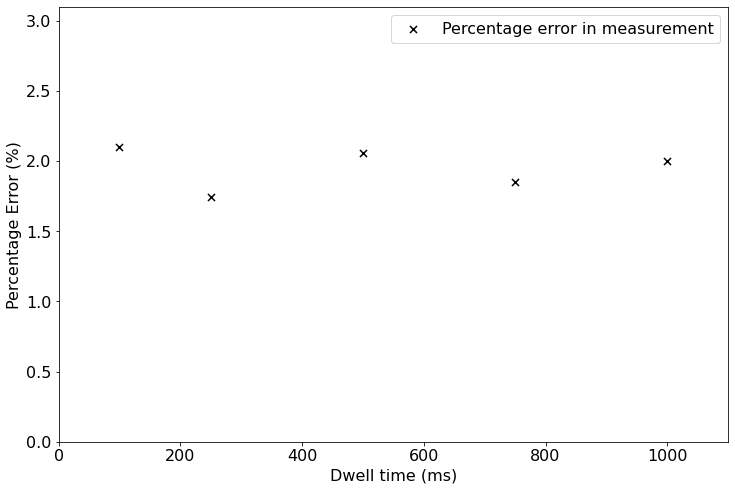

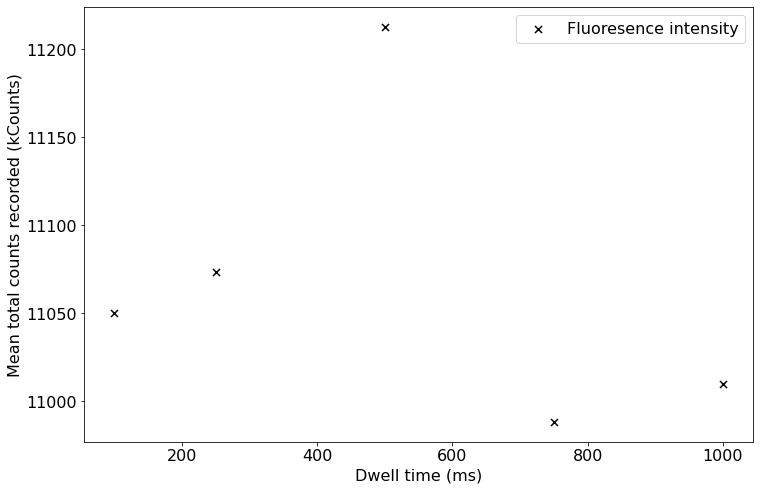

In [50]:
fig, ax = plot.subplots()
ax.scatter(line_repeats, fractional_error[:, f_value], marker = 'x', color = 'k', 
           label = 'Percentage error in measurement', s = 50)
ax.set_xlabel('Dwell time (ms)')
ax.set_ylabel('Percentage Error (%)')
#ax.plot(line_repeats, y, label = 'A/sqrt(b*T) + c', color = 'k',
#        linestyle = '--')
plot.axis([0, 1100, 0, np.max(fractional_error[:, f_value])+1])
ax.legend()

if I[3,0] > 1:
    fig1, ax1 = plot.subplots()
    ax1.scatter(line_repeats, I[:, f_value], marker = 'x', color = 'k', 
           label = 'Fluoresence intensity', s = 50)
    ax1.set_xlabel('Dwell time (ms)')
    ax1.set_ylabel('Mean total counts recorded (kCounts)')
    #ax1.plot(line_repeats, y2, label = 'Linear Fitting', color = 'k', 
    #    linestyle = '--')
    #plot.axis([0, 110, 0, 100])
    ax1.legend()

In [435]:
if I[3,0] > 1:
    fig.savefig(folder_path + 'I_' + str(f_value + 1) + '_percentage_error.pdf')
    fig1.savefig(folder_path + 'I_' + str(f_value + 1) + '_Intensity_plot.pdf')
else:
    fig.savefig(folder_path + 'I_' + str(f_value + 1) + 'normailised_I_percentage_error.pdf')

In [423]:
if I[3,0] > 1:
    output_data_file1 = folder_path + 'percentage_error_analysis.txt'
    output_data_file2 = folder_path + 'Intensity_analysis.txt'
else: 
    output_data_file1 = folder_path + 'Normalised_percentage_error_analysis.txt'
    
    
if os.path.isfile(output_data_file1) == False:
        with open(output_data_file1, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 'Time Constant' + '\t' + 
                     'Offset' + '\n')
# Writing contrast dip description to the .dat file
    
with open(output_data_file1, "a") as wf:
    wf.write(str(f_value)  + '\t' +
             str(coeffs[0]) + " \t"  + str(coeffs[1]) + " \t" + 
             str(coeffs[2]) + '\n')
            
            
if I[3,0] > 1:
    if os.path.isfile(output_data_file2) == False:
        with open(output_data_file2, "w") as wf:
            wf.write('I(i)'  + '\t' +
                     'Gradient' + '\t' + 
                     'Offset' + '\n')            
            
        with open(output_data_file2, "a") as wf:
            wf.write(str(f_value)  + '\t' +
            str(coeffs_1[0]) + " \t"  + str(coeffs_1[1]) +  '\n') 